<a href="https://colab.research.google.com/github/WuilsonEstacio/github-para-estadistica/blob/main/Estadistica3_y_prueba_de_hipotesis_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm

In [ ]:
# Create a Population DataFrame with 10 data 

data = pd.DataFrame()
data['Population'] = [47, 48, 85, 20, 19, 13, 72, 16, 50, 60]

In [ ]:
# Extraer muestra con reemplazo, tamaño = 5 de Población
a_sample_with_replacement = data['Population'].sample(5, replace=True)
print(a_sample_with_replacement)

8    50
7    16
5    13
8    50
4    19
Name: Population, dtype: int64


In [ ]:
# Draw sample without replacement, size=5 from Population

a_sample_without_replacement = data['Population'].sample(5, replace=False)
print(a_sample_without_replacement)

5    13
2    85
0    47
3    20
4    19
Name: Population, dtype: int64



# Parameters and Statistics

In [ ]:
# Calculate mean and variance
population_mean = data['Population'].mean() # mean() la utilizamos para calcular la media
population_var = data['Population'].var(ddof=0) # var la utlilizamos para calcular la varianza
print('Population mean is ', population_mean)
print('Population variance is', population_var)

Population mean is  43.0
Population variance is 571.8


In [ ]:
# Calcular la media muestral y la desviación estándar muestral, tamaño = 10
# Obtendrá diferentes medias y variaciones cada vez que ejecute el siguiente código

a_sample = data['Population'].sample(10, replace=True)
sample_mean = a_sample.mean()
sample_var = a_sample.var()
print('Sample mean is ', sample_mean)
print('Sample variance is', sample_var)

Sample mean is  38.0
Sample variance is 529.1111111111111


# Average of an unbiased estimator

In [ ]:
sample_length = 500
sample_variance_collection=[data['Population'].sample(10, replace=True).var(ddof=1) for i in range(sample_length)]

# Variation of Sample

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# La media de la muestra y la SD siguen cambiando, pero siempre dentro de un rango determinado
Fstsample = pd.DataFrame(np.random.normal(10, 5, size=30))
print('sample mean is ', Fstsample[0].mean())
print('sample SD is ', Fstsample[0].std(ddof=1))

sample mean is  10.159073903854283
sample SD is  5.667490240205792


# Empirical Distribution of mean

In [ ]:
meanlist = []
for t in range(10000):
    sample = pd.DataFrame(np.random.normal(10, 5, size=30)) # 10 es la media , 5 es la std desviacion estandar 
    meanlist.append(sample[0].mean())

In [ ]:
collection = pd.DataFrame()
collection['meanlist'] = meanlist

AttributeError: ignored

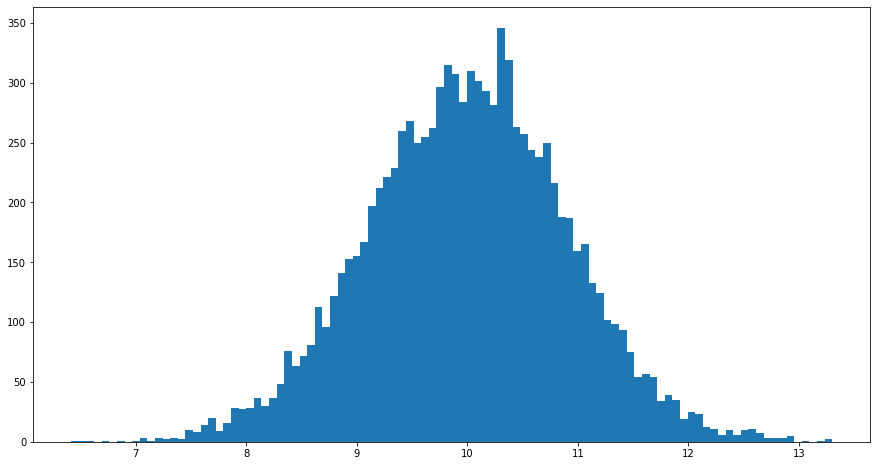

In [ ]:
collection['meanlist'].hist(bins=100, normed=1,figsize=(15,8))

# Sampling from arbritary distribution

AttributeError: ignored

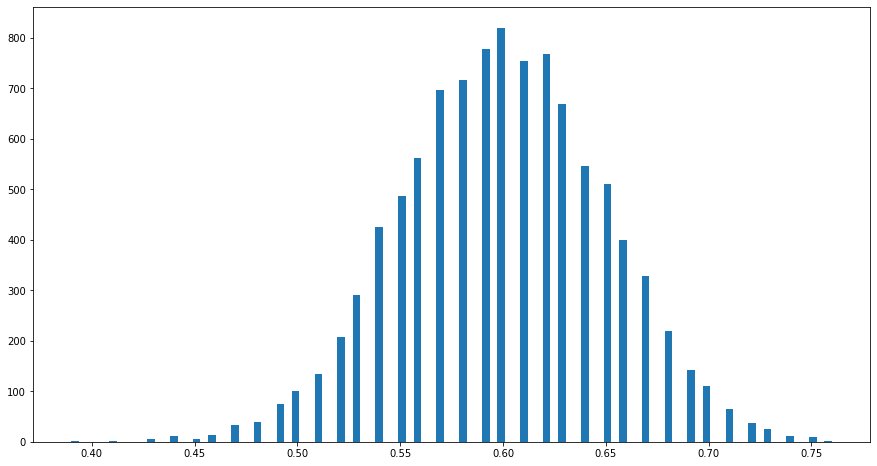

In [ ]:
# See what central limit theorem tells you...the sample size is larger enough, 
# the distribution of sample mean is approximately normal
# apop is not normal, but try to change the sample size from 100 to a larger number. The distribution of sample mean of apop 
# becomes normal.
sample_size = 100
samplemeanlist = []
apop =  pd.DataFrame([1, 0, 1, 0, 1])
for t in range(10000):
    sample = apop[0].sample(sample_size, replace=True)  # small sample size
    samplemeanlist.append(sample.mean())

acollec = pd.DataFrame()
acollec['meanlist'] = samplemeanlist
acollec.hist(bins=100, normed=1,figsize=(15,8))

In [ ]:
from scipy.stats import norm

In [ ]:
ms = pd.read_csv('/content/microsoft.csv',index_col = 0)
ms.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100



# Estimate the average stock return with 90% Confidence Interval

In [ ]:
# we will use log return for average stock return of Microsoft

ms['logReturn'] = np.log(ms['Close'].shift(-1)) - np.log(ms['Close'])

De forma predeterminada, norm.ppfusa mean = 0 y stddev = 1, que es la distribución normal "estándar". Puede utilizar una media y una desviación estándar diferentes especificando los argumentos locy scale, respectivamente.
Si observa el código fuente de scipy.stats.norm, encontrará que el ppfmétodo finalmente llama scipy.special.ndtri. Entonces, para calcular la inversa de la CDF de la distribución normal estándar, puede usar esa función directamente:

In [ ]:
# Lets build 90% confidence interval for log return
# Construyamos un intervalo de confianza del 90% para el retorno de registros
sample_size = ms['logReturn'].shape[0] # shapees una tupla que le da una indicación del número de dimensiones en la matriz.
sample_mean = ms['logReturn'].mean()
sample_std = ms['logReturn'].std(ddof=1) / sample_size**0.5

# left and right quantile
z_left = norm.ppf(0.1)
z_right = norm.ppf(0.9)

# upper and lower bound
interval_left = sample_mean+z_left*sample_std
interval_right = sample_mean+z_right*sample_std

In [ ]:
# 90% confidence interval tells you that there will be 90% chance that the average stock return lies between "interval_left"
# and "interval_right".

print('90% confidence interval is ', (interval_left, interval_right))

90% confidence interval is  (0.00016900921195778804, 0.0014714537602882566)



# Hypothesis testing

In [ ]:
# import microsoft.csv, and add a new feature - logreturn
ms = pd.read_csv('microsoft.csv', index_col = 0)
ms['logReturn'] = np.log(ms['Close'].shift(-1)) - np.log(ms['Close'])

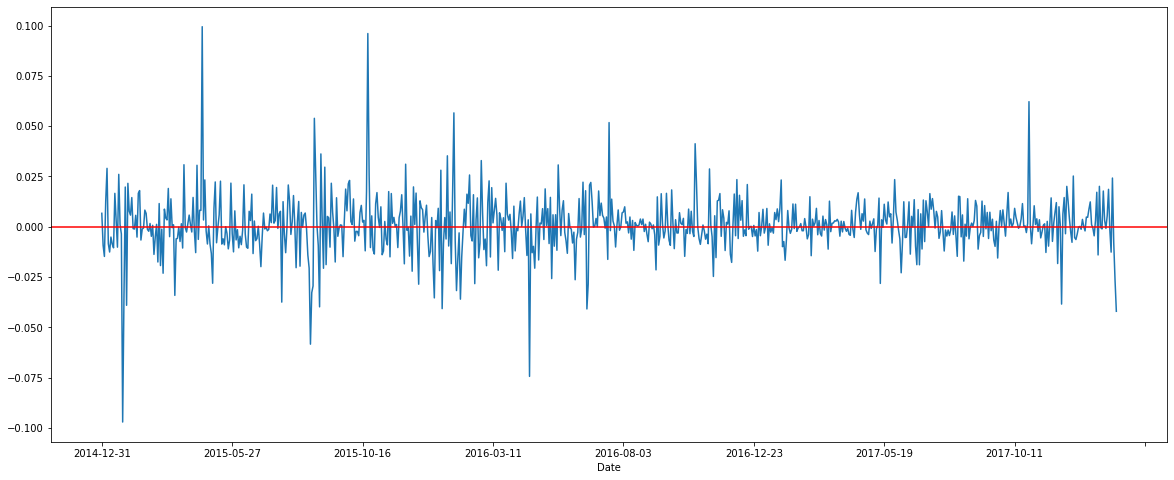

In [ ]:
# Log return goes up and down during the period 
# El retorno de registros sube y baja durante el período
ms['logReturn'].plot(figsize=(20, 8))
plt.axhline(0, color='red')
plt.show()


# Steps involved in testing a claim by hypothesis testing
# Step 1:
 Set hypothesis
$H_0 : \mu = 0$ $H_a : \mu \neq 0$

# H0 means the average stock return is 0 H1 means the average stock return is not equal to 0

Step 2: Calculate test statistic

Si Ha: mu no es igual a 0, es una prueba de dos colas y un valor p = 2 (1-norm.cdf (np.abs (z), 0, 1))

si Ha: mu> 0, es la prueba de la cola superior y el valor p = 1-norm.cdf (z, 0,1)

si Ha: mu <0, es una prueba de cola inferior y valor p = norm.cdf (z, 0,1)

In [ ]:
# aqui estaremos una z distribucion la cual se utiliza para muestras grandes.
sample_mean = ms['logReturn'].mean() # sample_mean es la media muestral, el rendimiento diario promedio.
sample_std = ms['logReturn'].std(ddof=1) # sample_std es la desviación estándar de la muestra, n es el tamaño de la muestra.
n = ms['logReturn'].shape[0]

# if sample size n is large enough, we can use z-distribution, instead of t-distribtuion
# mu = 0 under the null hypothesis
zhat = (sample_mean - 0)/(sample_std/n**0.5) # z=(x-mu)/sigma/sqrt(n) aqui asumimos que mu es cero 
print(zhat)


1.6141477140003675


# Step 3: Set desicion criteria

In [ ]:
# confidence level  nivel de confianza
alpha = 0.05

zleft = norm.ppf(alpha/2, 0, 1)
zright = -zleft  # z-distribution is symmetric 
print(zleft, zright)

-1.9599639845400545 1.9599639845400545


# Step 4: Make decision - shall we reject H0?

In [ ]:
print('At significant level of {}, shall we reject: {}'.format(alpha, zhat>zright or zhat<zleft))

At significant level of 0.05, shall we reject: False


# An alternative method: p-value

In [ ]:
# step 3 (p-value)
p = 1 - norm.cdf(zhat, 0, 1)
print(p)

In [ ]:
# step 4
print('At significant level of {}, shall we reject: {}'.format(alpha, p < alpha))